# Exercise 5.20

In [1]:
import pathlib
import pandas as pd
from IPython.display import display, Math
from chapter_5_utils import *

In [2]:
def load_data() -> pd.DataFrame:
    # Load the bird data from Table 5.12.
    # Both tail length and wing length are in millimeters.
    fpath = pathlib.WindowsPath(r'..\..\data\Table5.12.xlsx')
    return pd.read_excel(fpath)

In [3]:
bird_df = load_data()
n, p = bird_df.shape

In [4]:
bird_df.head(3)

,Tail length,Wing length
0,191,284
1,197,285
2,208,288


## (a)

In [5]:
alpha = 0.05
mu0 = np.array([[190], [275]])

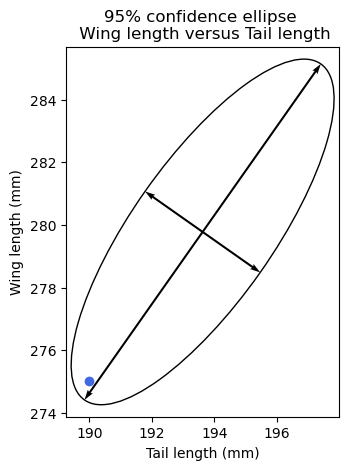

In [6]:
a_plt, a_ax = plot_confidence_ellipse(bird_df, n, p, alpha)
a_plt.plot(mu0[0], mu0[1], marker='o', color='royalblue')
a_plt.xlabel('Tail length (mm)')
a_plt.ylabel('Wing length (mm)')
a_plt.title('95% confidence ellipse \n Wing length versus Tail length')
a_ax.set_aspect('equal')
a_plt.savefig('Question-5-20-a.png')
a_plt.show()

## (b)

In [7]:
X = bird_df.to_numpy()

In [8]:
xbar = np.mean(X, axis=0).reshape(p, 1)
S = np.cov(X, rowvar=False)
f_crit = stats.f.ppf(1-alpha, dfn=p, dfd=n-p)
const = ((n-1)*p)/(n-p)

The 95% $T^{2}$ simultaneous confidence intervals:
$$
\bar{x}_{i}
\pm
\sqrt{
    \frac{(n-1)p}{(n-p)}
    F_{p, n-p}\left(\alpha\right)
}
\sqrt{
    \frac{s_{ii}}{n}
}
$$

In [9]:
simult_ci = simult_conf_int(X, alpha, p)
# simult_ci

In [10]:
for i in range(simult_ci.shape[0]):
    display(Math(fr'{xbar[i,0]:.2f} \pm \sqrt{{{const*f_crit:.2f}}} '\
                 fr'\frac{{\sqrt{{{S[i,i]:.2f}}}}}{{\sqrt{{{n}}}}}\hspace{{0.5cm}} \text{{contains}}'\
                 fr'\hspace{{0.5cm}}\mu_{i+1}\hspace{{1cm}}\text{{or}}'\
                 fr'\hspace{{1cm}}{simult_ci[i,0]:.2f} \leq \mu_{i+1} '\
                 fr'\leq {simult_ci[i,1]:.2f}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The 95% Bonferroni confidence intervals:
$$
\bar{x}_{i}
\pm
t_{n-1}
\left(\frac{\alpha}{2m}\right)
\sqrt{
    \frac{
            s_{ii}
        }{
            n
        }
    }
$$

In [11]:
bonfer_ci = bonferroni_conf_int(X, m=2, alpha=alpha)
# bonfer_ci

In [12]:
m=2
t_crit = stats.t.ppf(1-(alpha/(2*m)), n-1)
print(f'Bonferroni confidence intervals for the {p} mean lengths')
for i in range(bonfer_ci.shape[0]):
    display(Math(fr'{xbar[i,0]:.2f} \pm {t_crit:.2f} \frac{{\sqrt{{{S[i,i]:.2f}}}}}'\
                 fr'{{\sqrt{{{n}}}}}\hspace{{0.5cm}} \text{{contains}}'\
                 fr'\hspace{{0.5cm}}\mu_{i+1}\hspace{{1cm}}\text{{or}}'\
                 fr'\hspace{{1cm}}{bonfer_ci[i,0]:.2f} \leq \mu_{i+1} '\
                 fr'\leq {bonfer_ci[i,1]:.2f}'))

Bonferroni confidence intervals for the 2 mean lengths


<IPython.core.display.Math object>

<IPython.core.display.Math object>

## (c)

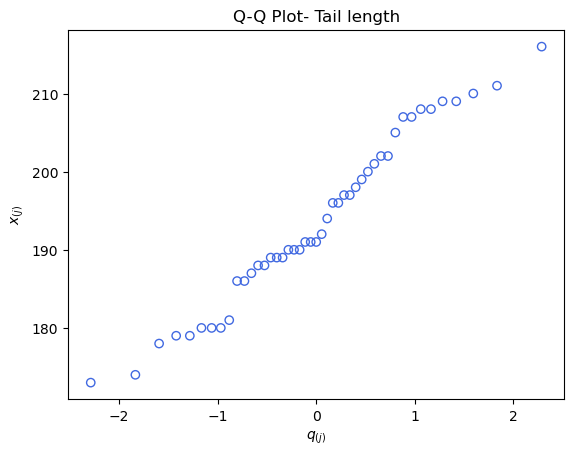

In [13]:
my_q_q_plot(X[:, 0])
ax = plt.gca()
plt.title('Q-Q Plot- Tail length')
plt.xlabel('$q_{(j)}$')
plt.ylabel('$x_{(j)}$')
plt.savefig('Question-5-20-c-QQ-TailLen.png')
plt.show()

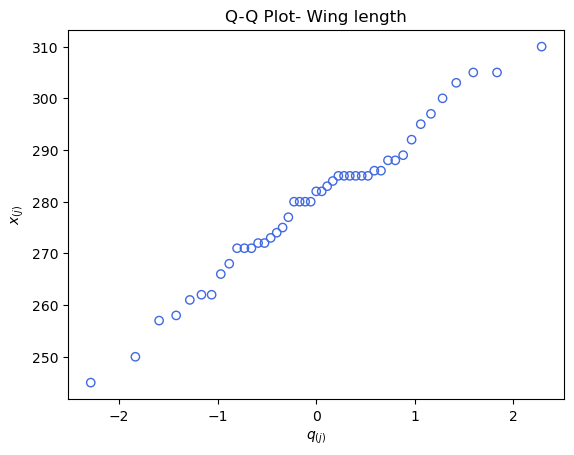

In [14]:
my_q_q_plot(X[:, 1])
ax = plt.gca()
plt.title('Q-Q Plot- Wing length')
plt.xlabel('$q_{(j)}$')
plt.ylabel('$x_{(j)}$')
plt.savefig('Question-5-20-c-QQ-WingLen.png')
plt.show()

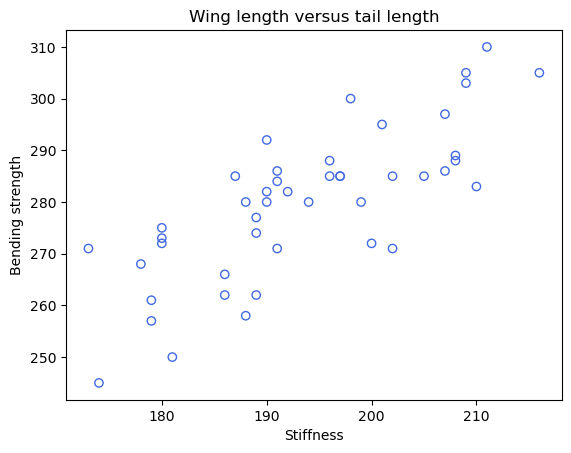

In [15]:
plt.scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors='royalblue')
plt.xlabel('Stiffness')
plt.ylabel('Bending strength')
plt.title('Wing length versus tail length')
plt.savefig('Question-5-20-c-xy.png')
plt.show()

In [16]:
# Compute the squared distance values to create a chi-squared plot.
d2_data = list()
for i in range(n):
    d2 = ((X[i,:].reshape(p, 1) - xbar).T @ np.linalg.inv(S) @ (X[i,:].reshape(p, 1) - xbar)).item()
    d2_data.append(d2)
d2_data.sort()

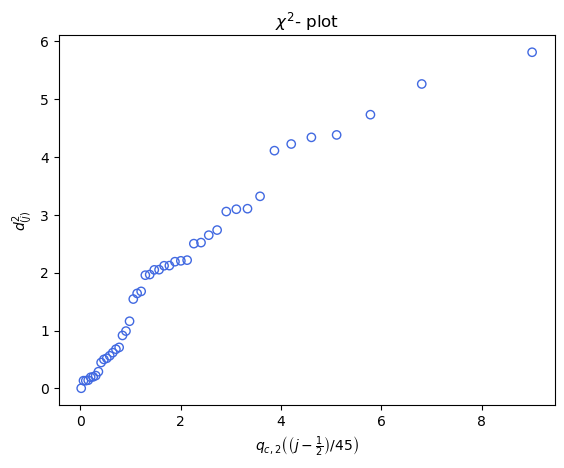

In [17]:
plt.scatter(
    stats.chi2.ppf([((i+1) - 0.50)/n for i in range(n)], df=p),
    d2_data,
    facecolors='none',
    edgecolors='royalblue'
)
plt.xlabel(fr'$q_{{c,{p}}}\left(\left(j-\frac{{1}}{{2}}\right)/{n}\right)$')
plt.ylabel('$d_{(j)}^{2}$')
plt.title('$\chi^{2}$- plot')
plt.show()

In [18]:
# We'd expect to see 50% of the d^{2} values to be less than 1.3863.
(d2_data < stats.chi2.ppf(0.50, df=p)).sum() / n

0.4